# Table booking and online delivery

### step 1: importing the libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2: loading the dataset

In [5]:
df= pd.read_csv(r'C:\machine-learning\cognifyz-internship\Dataset .csv')

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (9551, 21)


### step 3: handling missing values

In [8]:
print("\nMissing values per column:")
df.isnull().sum()




Missing values per column:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.dropna(inplace=True)
print("\nDataset shape after dropping missing values:", df.shape)


Dataset shape after dropping missing values: (9542, 21)


### step 4: finding out the percentage of restaurants that offer table booking

In [10]:
tb_count = df['Has Table booking'].value_counts(normalize=True)*100
print("\nTable booking distribution:")
print(tb_count)


Table booking distribution:
Has Table booking
No     87.864179
Yes    12.135821
Name: proportion, dtype: float64


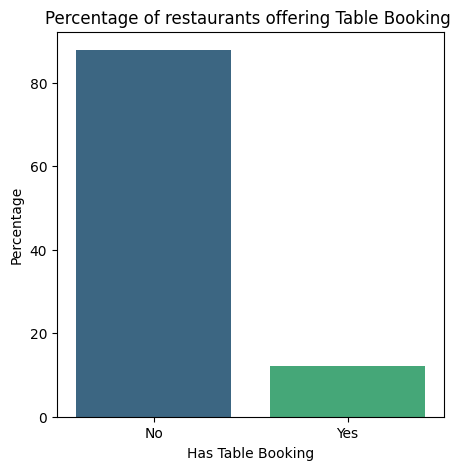

In [35]:
plt.figure(figsize=(5, 5))
sns.barplot(x=tb_count.index, y=tb_count.values, palette='viridis', hue= tb_count.index, legend=False)
plt.title('Percentage of restaurants offering Table Booking ')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()



### step 5: finding out the percentage of restaurants that offer online delivery

In [36]:
od_count = df['Has Online delivery'].value_counts(normalize=True)*100
print("\nOnline delivery distribution:")    
print(od_count)


Online delivery distribution:
Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64


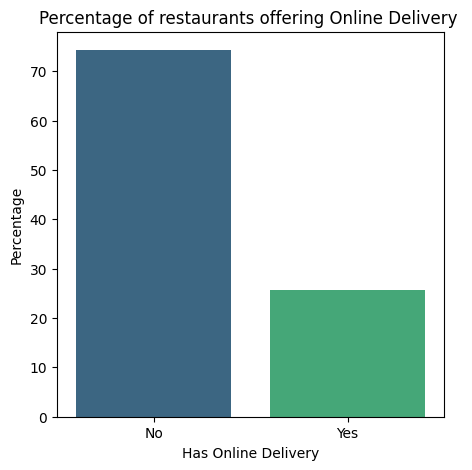

In [24]:
plt.figure(figsize=(5, 5))
sns.barplot(x=od_count.index, y=od_count.values, palette='viridis', hue= od_count.index, legend=False)
plt.title('Percentage of restaurants offering Online Delivery ')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


### step 6: comparing the average rating of restaurants that offer table booking with the ones that don't

In [26]:
tb_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage rating for restaurants with and without table booking:")
print(tb_rating)


Average rating for restaurants with and without table booking:
Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64


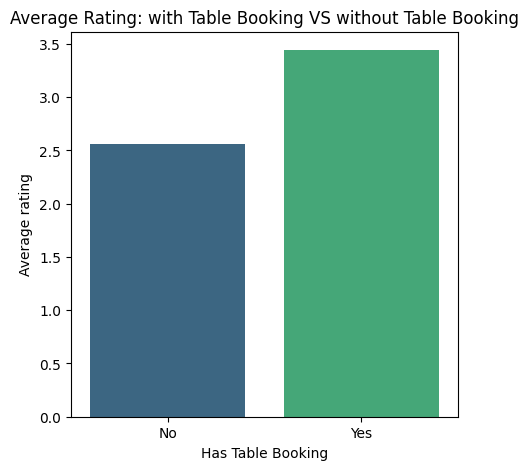

In [27]:
plt.figure(figsize=(5, 5))
sns.barplot(x=tb_rating.index, y=tb_rating.values, palette='viridis', hue= tb_rating.index, legend=False)
plt.title('Average Rating: with Table Booking VS without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average rating')
plt.xticks(rotation=0)
plt.show()


### step 7: finding the availability of online delivery among restaurants with various price range

In [29]:
delivery_byprice = df.groupby(['Price range', 'Has Online delivery'])['Aggregate rating'].size().unstack().fillna(0)
delivery_byprice_percent= delivery_byprice.div(delivery_byprice.sum(axis=1), axis=0) * 100
delivery_byprice_percent

Has Online delivery,No,Yes
Price range,,
1,84.204597,15.795403
2,58.689367,41.310633
3,70.747331,29.252669
4,90.955631,9.044369


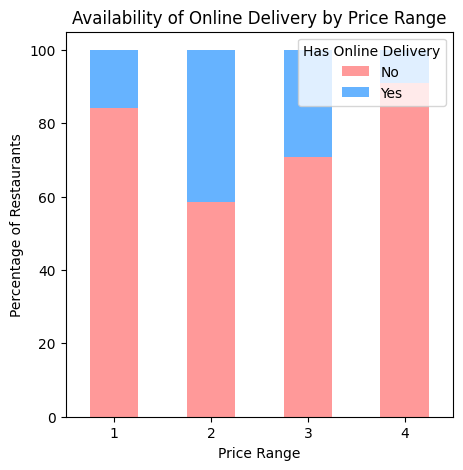

In [34]:
delivery_byprice_percent.plot(kind='bar', stacked=True, figsize=(5, 5), color=['#ff9999', '#66b3ff'])
plt.title('Availability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Has Online Delivery', loc='upper right')
plt.show()

### end of task 1: Level 2